# Library

In [1]:
import requests
import json
import pandas as pd

# API Test

After inspecting the elements of the Tokopedia web, we look for the product search API on the Network : <br/>
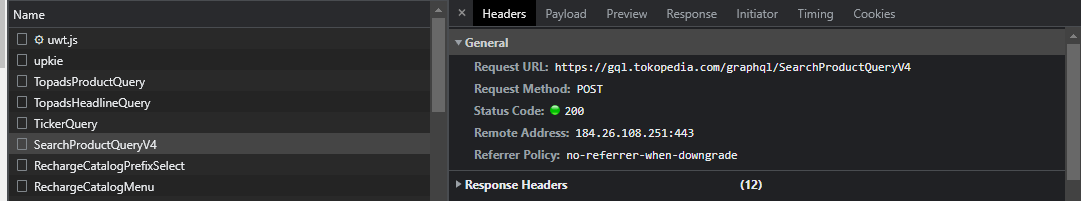
<br/>
<br/>
After that, don't forget to check the payload that we will send to the API : <br/>
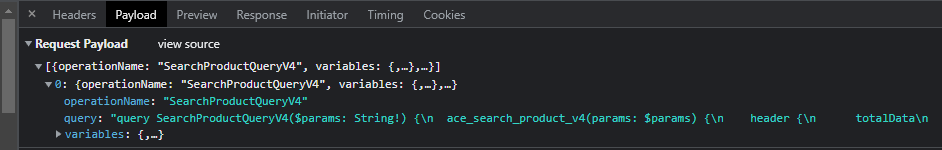

In [2]:
# Url API Tokopedia
url = "https://gql.tokopedia.com/graphql/SearchProductQueryV4"

In [3]:
# parameter payload untuk request
payload = [{
    "operationName": "SearchProductQueryV4",
    "variables": {
        "params":"device=desktop&navsource=&ob=23&page=1&q=laptop&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start=0&topads_bucket=true&unique_id=6eda2012b4d2f10fc3771107557ed2d8&user_addressId=134530772&user_cityId=256&user_districtId=3598&user_id=7257742&user_lat=-7.759479&user_long=110.3740144&user_postCode=55284&user_warehouseId=0&variants="
    },
    "query": "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [4]:
# Request API to Tokopedia
req = requests.post(url, json=payload)

# Check status request
if req.status_code == 200:
    print("Request Success")

Request Success


In [5]:
# Convert response to json
data = req.json()

# Start scrapping
to check where the data is stored we can see in the preview section 

In [6]:
# Get product data stored in data variable
product = data[0]['data']['ace_search_product_v4']['data']['products']

In [7]:
# check the first product
product[0]

{'id': 2303557953,
 'name': 'LAPTOP XIAOMI Redmi Book 15 - Core i3-1115G4 8GB 256GB 15.6" FHD W10',
 'ads': {'adsId': '',
  'productClickUrl': '',
  'productWishlistUrl': '',
  'productViewUrl': '',
  '__typename': 'AceSearchUnifyAds'},
 'badges': [{'title': 'Official Store',
   'imageUrl': 'https://images.tokopedia.net/img/official_store_badge.png',
   'show': True,
   '__typename': 'AceSearchUnifyBadge'}],
 'category': 3982,
 'categoryBreadcrumb': 'komputer-laptop/laptop/laptop-consumer',
 'categoryId': 297,
 'categoryName': 'Komputer & Laptop',
 'countReview': 75,
 'customVideoURL': '',
 'discountPercentage': 42,
 'gaKey': '/searchproduct/komputer-laptop/laptop/laptop-consumer/laptop/protechcom/laptop-xiaomi-redmi-book-15-core-i3-1115g4-8gb-256gb-15-6-fhd-w10',
 'imageUrl': 'https://images.tokopedia.net/img/cache/200-square/VqbcmM/2021/10/19/e8b11ae8-8d35-4fc3-b7e2-cf326949e192.jpg',
 'labelGroups': [{'position': 'price',
   'title': 'Cashback 2%',
   'type': 'lightGreen',
   'url':

In [8]:
# check the length of product
len(product)

60

In [9]:
# Get all product

# create empty list
product_title = []
product_price = []
product_rating = []
product_url = []
product_discount = []
product_count_review = []
product_shop_name = []
product_shop_city = []


# create loop to get all product
for i in range(0,len(product)):
    product_title.append(product[i]['name'])
    product_price.append(product[i]['price'])
    product_rating.append(product[i]['rating'])
    product_url.append(product[i]['url'])
    product_discount.append(product[i]['discountPercentage'])
    product_count_review.append(product[i]['countReview'])
    product_shop_name.append(product[i]['shop']['name'])
    product_shop_city.append(product[i]['shop']['city'])

In [10]:
# Check the length of each list
len(product_title), len(product_price), len(product_rating), len(product_url), len(product_discount), len(product_count_review), len(product_shop_name), len(product_shop_city)

(60, 60, 60, 60, 60, 60, 60, 60)

In [11]:
# Create dataframe
df = pd.DataFrame({
    'product_title': product_title,
    'product_price': product_price,
    'product_rating': product_rating,
    'product_url': product_url,
    'product_discount': product_discount,
    'product_count_review': product_count_review,
    'product_shop_name': product_shop_name,
    'product_shop_city': product_shop_city
})

# Check the dataframe
df.head()

,product_title,product_price,product_rating,product_url,product_discount,product_count_review,product_shop_name,product_shop_city
0,LAPTOP XIAOMI Redmi Book 15 - Core i3-1115G4 8...,Rp4.919.000,5,https://www.tokopedia.com/protechcom/laptop-xi...,42,75,Protech Computer,Jakarta Pusat
1,Xiaomi RedmiBook 15 Intel Core i3 Garansi Resmi,Rp4.695.000,5,https://www.tokopedia.com/pandawatiga/xiaomi-r...,6,40,Pandawatiga,Jakarta Pusat
2,"HP CHROMEBOOK 11 G8 / N4020/4GB/160GB/11.6""HD ...",Rp2.221.560,5,https://www.tokopedia.com/agreshpauthorized/hp...,28,849,AGRES - HP Authorized,Jakarta Utara
3,ACER Nitro 5 AN515-58 - RTX3050 i5-12500H 16GB...,Rp12.839.999,5,https://www.tokopedia.com/intelgamingid/acer-n...,31,192,Intel Gaming ID,Jakarta Utara
4,Lenovo Ideapad Slim 3i 14 N4020 4GB 256SSD W11...,Rp3.999.000,5,https://www.tokopedia.com/lenovolegion/lenovo-...,20,63,Lenovo Legion Official,Jakarta Timur


# How to scrape all product with "laptop" search key ?

In [12]:
# Check url 1-5

# https://www.tokopedia.com/search?navsource=home&page=1&q=laptop&source=universe&srp_component_id=01.02.01.01&st=product
# https://www.tokopedia.com/search?navsource=home&page=2&q=laptop&source=universe&srp_component_id=01.02.01.01&st=product
# https://www.tokopedia.com/search?navsource=home&page=3&q=laptop&source=universe&srp_component_id=01.02.01.01&st=product
# https://www.tokopedia.com/search?navsource=home&page=4&q=laptop&source=universe&srp_component_id=01.02.01.01&st=product
# https://www.tokopedia.com/search?navsource=home&page=5&q=laptop&source=universe&srp_component_id=01.02.01.01&st=product

# We can see that page 1-5 have different on page=... So we will build iteration to get all params

In [13]:
# define what we look for scrapping
cari = 'laptop'

In [14]:
# We check the url availability first for 'laptop' product 
# Max URL is 100 : https://www.tokopedia.com/search?navsource=home&page=100&q=laptop&source=universe&srp_component_id=01.02.01.01&st=product


# built function to get params
def get_params():
    params=[]
    for i in range(1, 101):
        param = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=6eda2012b4d2f10fc3771107557ed2d8&user_addressId=134530772&user_cityId=256&user_districtId=3598&user_id=7257742&user_lat=-7.759479&user_long=110.3740144&user_postCode=55284&user_warehouseId=0&variants=".format(i,cari,(i-1)*60)
        params.append(param)
    return params

In [15]:
# page 1-100
if __name__ == "__main__":
    params = get_params()
    for i in range(0,len(params)):
        param=params[i]
        print(param)

device=desktop&navsource=&ob=23&page=1&q=laptop&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start=0&topads_bucket=true&unique_id=6eda2012b4d2f10fc3771107557ed2d8&user_addressId=134530772&user_cityId=256&user_districtId=3598&user_id=7257742&user_lat=-7.759479&user_long=110.3740144&user_postCode=55284&user_warehouseId=0&variants=
device=desktop&navsource=&ob=23&page=2&q=laptop&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start=60&topads_bucket=true&unique_id=6eda2012b4d2f10fc3771107557ed2d8&user_addressId=134530772&user_cityId=256&user_districtId=3598&user_id=7257742&user_lat=-7.759479&user_long=110.3740144&user_postCode=55284&user_warehouseId=0&variants=
device=desktop&navsource=&ob=23&page=3&q=laptop&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component

In [16]:
# Function to scrape data

def scrape_data(param):
    
    payload = [{
    "operationName": "SearchProductQueryV4",
    "variables": {
        "params":param
    },
    "query": "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]
    scrape_data=[]
    req2 = requests.post(url,json=payload).json()
    rows2 = req2[0]['data']['ace_search_product_v4']['data']['products']
    for i in range(0,len(rows2)):
        nama_product2 = rows2[i]['name']
        harga_product2 = rows2[i]['price']
        rating_product2 = rows2[i]['rating']
        link_product2 = rows2[i]['url']
        discount_product2 = rows2[i]['discountPercentage']
        count_review2 = rows2[i]['countReview']
        nama_toko2 = rows2[i]['shop']['name']
        lokasi_toko2 = rows2[i]['shop']['city']
        scrape_data.append(
            (nama_product2,harga_product2,rating_product2,link_product2,discount_product2,count_review2,nama_toko2,lokasi_toko2)  
        )
    return scrape_data

In [17]:
# Get all data from page 1-100

if __name__ == "__main__":
    params = get_params()
    all_data=[]
    for i in range(0,len(params)):
        param=params[i]
        data=scrape_data(param)
        all_data.extend(data)
    print(all_data)

[('LAPTOP XIAOMI Redmi Book 15 - Core i3-1115G4 8GB 256GB 15.6" FHD W10', 'Rp4.919.000', 5, 'https://www.tokopedia.com/protechcom/laptop-xiaomi-redmi-book-15-core-i3-1115g4-8gb-256gb-15-6-fhd-w10?extParam=ivf%3Dfalse%26src%3Dsearch', 42, 75, 'Protech Computer', 'Jakarta Pusat'), ('Xiaomi RedmiBook 15 Intel Core i3 Garansi Resmi', 'Rp4.695.000', 5, 'https://www.tokopedia.com/pandawatiga/xiaomi-redmibook-15-intel-core-i3-garansi-resmi-promo-grey-256gb?extParam=ivf%3Dfalse%26src%3Dsearch', 6, 40, 'Pandawatiga', 'Jakarta Pusat'), ('HP CHROMEBOOK 11 G8 / N4020/4GB/160GB/11.6"HD LAPTOP PELAJAR MURAH', 'Rp2.221.560', 5, 'https://www.tokopedia.com/agreshpauthorized/hp-chromebook-11-g8-n4020-4gb-160gb-11-6-hd-laptop-pelajar-murah-bundle-s-pro-160gb?extParam=ivf%3Dfalse%26src%3Dsearch', 28, 849, 'AGRES - HP Authorized', 'Jakarta Utara'), ('ACER Nitro 5 AN515-58 - RTX3050 i5-12500H 16GB 512SSD WIN11 15.6 144Hz', 'Rp12.839.999', 5, 'https://www.tokopedia.com/intelgamingid/acer-nitro-5-an515-58-rtx

In [18]:
# Make dataframe
data = pd.DataFrame(all_data,columns=['nama_product'
                                      ,'harga_product',
                                      'rating_product',
                                      'link_product',
                                      'discount_product',
                                      'count_review',
                                      'nama_toko',
                                      'lokasi_toko'])

# check data
data

,nama_product,harga_product,rating_product,link_product,discount_product,count_review,nama_toko,lokasi_toko
0,LAPTOP XIAOMI Redmi Book 15 - Core i3-1115G4 8...,Rp4.919.000,5,https://www.tokopedia.com/protechcom/laptop-xi...,42,75,Protech Computer,Jakarta Pusat
1,Xiaomi RedmiBook 15 Intel Core i3 Garansi Resmi,Rp4.695.000,5,https://www.tokopedia.com/pandawatiga/xiaomi-r...,6,40,Pandawatiga,Jakarta Pusat
2,"HP CHROMEBOOK 11 G8 / N4020/4GB/160GB/11.6""HD ...",Rp2.221.560,5,https://www.tokopedia.com/agreshpauthorized/hp...,28,849,AGRES - HP Authorized,Jakarta Utara
3,ACER Nitro 5 AN515-58 - RTX3050 i5-12500H 16GB...,Rp12.839.999,5,https://www.tokopedia.com/intelgamingid/acer-n...,31,192,Intel Gaming ID,Jakarta Utara
4,Lenovo Ideapad Slim 3i 14 N4020 4GB 256SSD W11...,Rp3.999.000,5,https://www.tokopedia.com/lenovolegion/lenovo-...,20,63,Lenovo Legion Official,Jakarta Timur
...,...,...,...,...,...,...,...,...
5995,"HP 14s CF2017TU N4020 RAM 8 SSD 256gb/14""/WIND...",Rp3.300.000,4,https://www.tokopedia.com/familybelanja/hp-14s...,0,4,FAMILY GAME,Jakarta Barat
5996,LAPTOP ACER ASPIRE 3 A315 RYZEN 3 3250 12GB 1t...,Rp4.999.000,5,https://www.tokopedia.com/narutoambas/laptop-a...,0,1,LAPTOP GROSIR ID,Jakarta Selatan
5997,"LENOVO IdeaPad Duet 3i-C1ID 10.3""WUXGA Touch/P...",Rp7.799.000,5,https://www.tokopedia.com/adain-aja/lenovo-ide...,0,1,Adain Aja,Jakarta Barat
5998,HP ENVY 15 OLED TOUCH INTEL I7 11800H 32GB 1TB...,Rp18.799.000,5,https://www.tokopedia.com/kliktech/hp-envy-15-...,0,2,KLIK Tech,Bekasi
